In [4]:
from google.colab import files
uploaded = files.upload()


Saving dogs_vs_cats.zip to dogs_vs_cats (1).zip


In [6]:
import zipfile
import os

zip_path = "/content/dogs_vs_cats (1).zip"      # Change if your file has a different name
extract_path = "/content/dogs_vs_cats"       # Destination folder

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction done!")


✅ Extraction done!


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
model = Sequential()

In [17]:
train_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/dogs_vs_cats/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory= '/content/dogs_vs_cats/dogs_vs_cats/test',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
#normalize
def process(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [20]:
#create cnn model
Model = Sequential()

Model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


Model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))


Model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', ))
Model.add(BatchNormalization())
Model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

Model.add(Flatten())

Model.add(Dense(128, activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(64, activation='relu'))
Model.add(Dropout(0.1))
Model.add(Dense(1, activation='sigmoid'))

In [21]:

Model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
Model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 58s 83ms/step - accuracy: 0.5678 - loss: 1.7339 - val_accuracy: 0.6022 - val_loss: 0.6891
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6951 - loss: 0.5926 - val_accuracy: 0.5002 - val_loss: 2.4386
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.7343 - loss: 0.5278 - val_accuracy: 0.7326 - val_loss: 0.5203
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 77ms/step - accuracy: 0.7995 - loss: 0.4275 - val_accuracy: 0.7836 - val_loss: 0.4512
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 76ms/step - accuracy: 0.8303 - loss: 0.3801 - val_accuracy: 0.8172 - val_loss: 0.4048
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 82ms/step - accuracy: 0.8700 - loss: 0.2891 - val_accuracy: 0.8192 - val_loss: 0.4653
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.9020 - loss: 0.2289 - val_accuracy: 0.8178 - val_loss: 0.5278
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 83ms/step - accuracy: 0.9379 - loss: 0.1491 - 

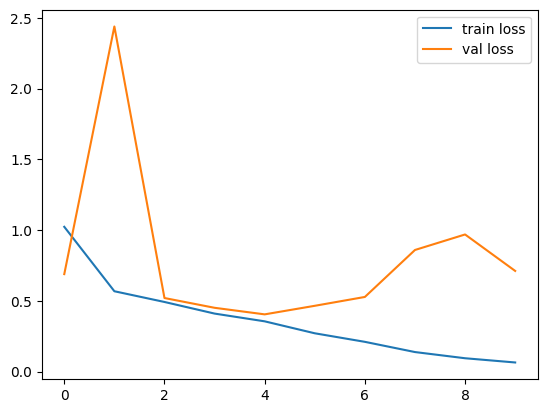

In [24]:
import matplotlib.pyplot as plt
plt.plot(Model.history.history['loss'], label='train loss')
plt.plot(Model.history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

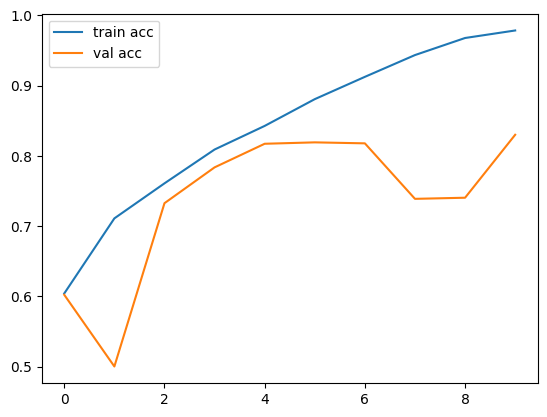

In [25]:
plt.plot(Model.history.history['accuracy'], label='train acc')
plt.plot(Model.history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [50]:
import cv2
import numpy as np

# Load image using OpenCV
img_path = '/content/cat.jpeg'  # Change as needed
img = cv2.imread(img_path)


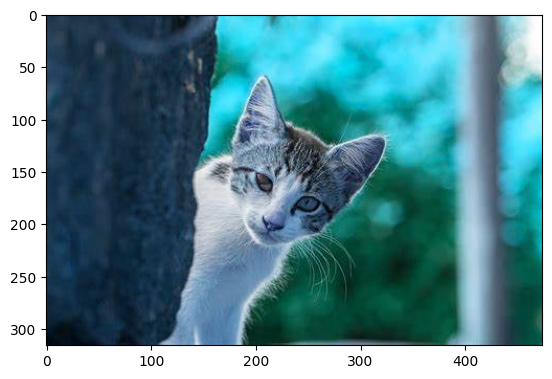

In [51]:
plt.imshow(img)

In [52]:

img_resized = cv2.resize(img, (256, 256))

test_input = img_resized.reshape((1,256,256,3))


In [53]:
test_input.shape

(1, 256, 256, 3)

In [54]:
Model.predict(test_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)